In [40]:
import pandas as pd
import numpy as np



In [41]:
df = pd.read_csv("log.csv")
print(df)


      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [43]:
from sklearn.model_selection import train_test_split


In [44]:

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

import matplotlib.pyplot as plt



In [45]:
display(df.head())

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [46]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})


In [47]:
X = df.iloc[:, :-1]   # customer features (Age, Salary, etc.)
y = df.iloc[:, -1]    # Purchased (target)

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (400, 4)
Target shape: (400,)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [49]:
import pandas as pd
pd.DataFrame(X_train).dtypes


,0
User ID,int64
Gender,int64
Age,int64
EstimatedSalary,int64


In [50]:
y_train.unique()


array([0, 1])

In [51]:
df = pd.get_dummies(df, drop_first=True)


In [52]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=11
)


In [54]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [55]:
print(X_train.dtype)     # float64
print(type(X_train))     # numpy.ndarray


float64
<class 'numpy.ndarray'>


In [56]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Model trained successfully ")


Model trained successfully 


In [57]:
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)
import matplotlib.pyplot as plt


In [58]:
y_pred = model.predict(X_test)


In [59]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[48  5]
 [11 16]]


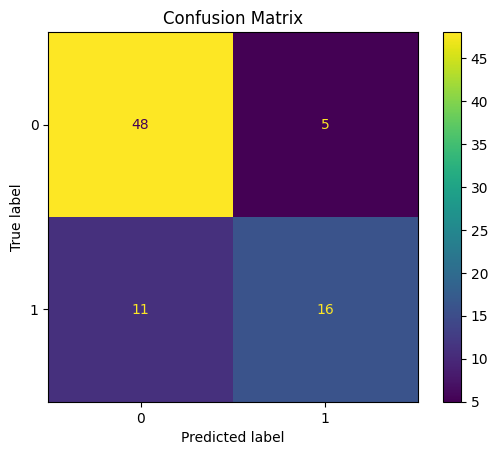

In [60]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.show()


In [61]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


Accuracy: 0.8


In [62]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.91      0.86        53
           1       0.76      0.59      0.67        27

    accuracy                           0.80        80
   macro avg       0.79      0.75      0.76        80
weighted avg       0.80      0.80      0.79        80



In [63]:
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))


Precision: 0.7619047619047619
Recall   : 0.5925925925925926
F1-score : 0.6666666666666666


In [64]:
y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.9028651292802237


In [65]:
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

print("Train Accuracy:", train_acc)
print("Test Accuracy :", test_acc)


Train Accuracy: 0.846875
Test Accuracy : 0.8


In [66]:
# IMPORT
from sklearn.metrics import precision_score

# PREDICTION
y_pred = model.predict(X_test)

#  PRECISION
precision = precision_score(y_test, y_pred)

print("Precision:", precision)


Precision: 0.7619047619047619


In [67]:
precision = precision_score(y_test, y_pred, pos_label=1)
print("Precision:", precision)


Precision: 0.7619047619047619


Decision Boundary


In [68]:
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']



In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=11
)


In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [71]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

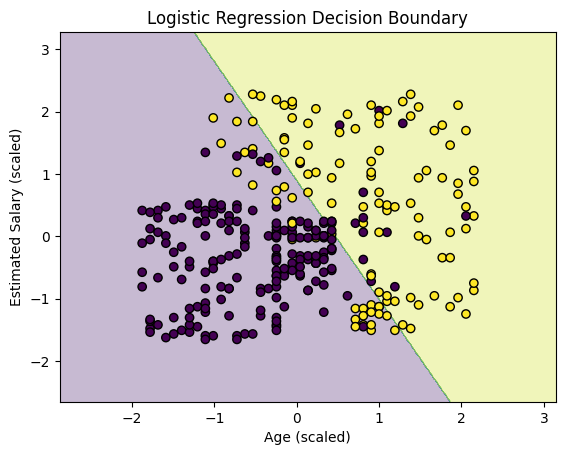

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# mesh grid
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.01),
    np.arange(y_min, y_max, 0.01)
)

# prediction on grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# plot boundary
plt.contourf(xx, yy, Z, alpha=0.3)

# plot actual points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k')

plt.xlabel("Age (scaled)")
plt.ylabel("Estimated Salary (scaled)")
plt.title("Logistic Regression Decision Boundary")
plt.show()
